In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
from tensorflow.keras.utils import to_categorical

warnings.filterwarnings('ignore')

In [3]:
# !python -m pip show tensorflow

In [5]:
# import sys
# print(sys.executable)
# !{sys.executable} -m pip install tensorflow


In [7]:
# print(sklearn.__version__)

In [9]:
# !pip install -U scikit-learn==1.6.0
# !pip install tensorflow==2.15


In [11]:
df = pd.read_csv(r"E:\Project\Hari Mini Project\GrowEver\Data\crop_data.csv")

In [13]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [15]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [17]:
df.size

17600

In [19]:
df.shape

(2200, 8)

In [21]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [23]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [25]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [27]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [29]:
# sns.heatmap(df.corr(),annot=True)

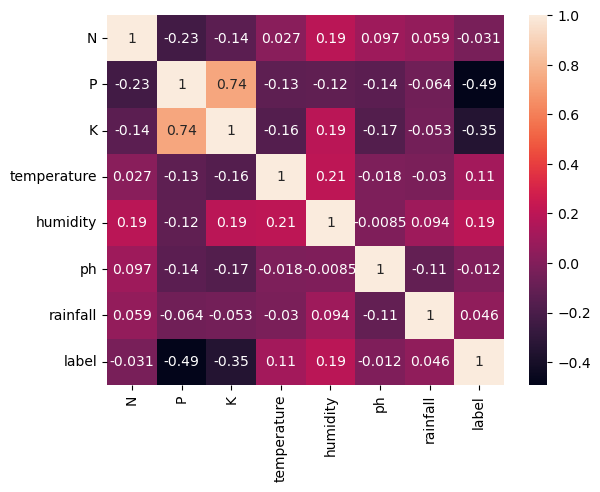

In [31]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']):
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

### Seperating features and target label

In [34]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [36]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
models = []

In [38]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [40]:
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = to_categorical(df['label_encoded'])

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Multi-Layer Perceptron

In [25]:
model_mlp = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

In [26]:
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
history = model_mlp.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)


Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2996 - loss: 2.7505 - val_accuracy: 0.6591 - val_loss: 1.5849
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7642 - loss: 1.2656 - val_accuracy: 0.8864 - val_loss: 0.6535
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8807 - loss: 0.5420 - val_accuracy: 0.9261 - val_loss: 0.3875
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9397 - loss: 0.3138 - val_accuracy: 0.9318 - val_loss: 0.2752
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9439 - loss: 0.2260 - val_accuracy: 0.9261 - val_loss: 0.2210
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9548 - loss: 0.1772 - val_accuracy: 0.9432 - val_loss: 0.1791
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9636 - loss: 0.1430 - val_accuracy: 0.9659 - val_loss: 0.1445
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9692 - loss: 0.1189 - val_accuracy: 0.9659 - val_loss:

In [28]:
loss, accuracy = model_mlp.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
models.append("Multi-Layer Perceptron")
acc.append(accuracy)
# print(f"{accuracy*100:.2f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9738 - loss: 0.0856
Test Accuracy: 97.27%


In [29]:
y_pred_probs = model_mlp.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.90      0.83      0.86        23
           9       0.91      1.00      0.95        20
          10       0.73      1.00      0.85        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.

In [30]:
# model_mlp.save('../models/MLP.h5')

# LSTM

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [52]:
model_lstm = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

In [53]:
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1140 - loss: 2.9571 - val_accuracy: 0.2159 - val_loss: 2.2345
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2786 - loss: 2.0082 - val_accuracy: 0.5057 - val_loss: 1.3627
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5419 - loss: 1.2814 - val_accuracy: 0.5341 - val_loss: 1.0870
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6460 - loss: 0.9890 - val_accuracy: 0.7386 - val_loss: 0.8338
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7302 - loss: 0.7900 - val_accuracy: 0.8125 - val_loss: 0.6700
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7868 - loss: 0.6341 - val_accuracy: 0.8239 - val_loss: 0.5242
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8303 - loss: 0.5209 - val_accuracy: 0.8807 - val_loss: 0.4680
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8616 - loss: 0.4463 - val_accuracy: 0.8920 - v

In [57]:
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
models.append("Long Short-Term Memory")
acc.append(accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9732 - loss: 0.0881
Test Accuracy: 97.05%


In [58]:
y_pred_probs = model_lstm.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.81      0.91      0.86        23
           9       0.95      1.00      0.98        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.

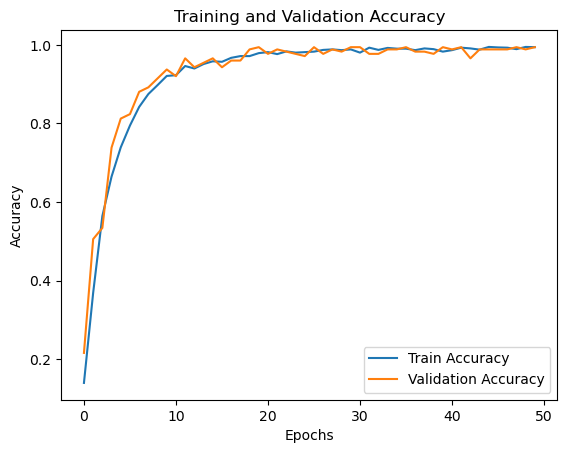

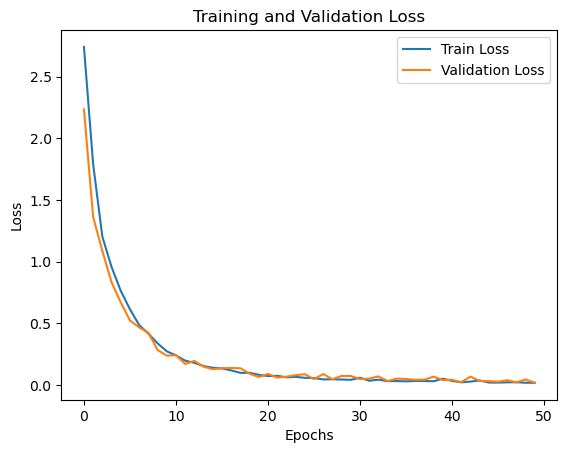

In [59]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


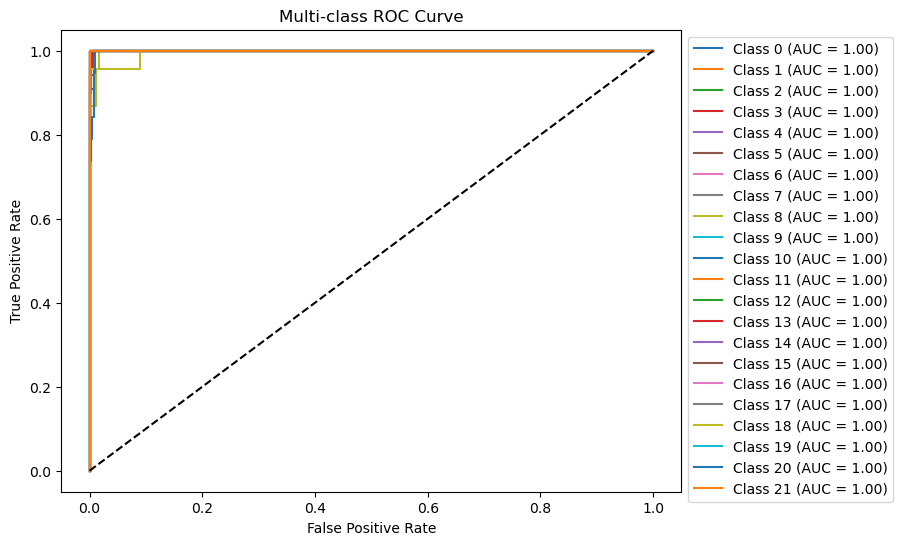

Macro-average AUC: 0.9996
Micro-average AUC: 0.9997


In [96]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_true is one-hot encoded
# If your y_test is categorical (integers), convert to one-hot:
# y_true_bin = to_categorical(y_test, num_classes)
y_true_bin = y_test   # already one-hot encoded
y_pred_prob = model_lstm.predict(X_test)   # probabilities

n_classes = y_true_bin.shape[1]
fpr, tpr, roc_auc = {}, {}, {}

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(bbox_to_anchor=(1, 1), ncol=1)
plt.show()

# Compute average AUC (macro/micro)
auc_macro = roc_auc_score(y_true_bin, y_pred_prob, multi_class='ovr', average='macro')
auc_micro = roc_auc_score(y_true_bin, y_pred_prob, multi_class='ovr', average='micro')

print(f"Macro-average AUC: {auc_macro:.4f}")
print(f"Micro-average AUC: {auc_micro:.4f}")


In [40]:
# model_lstm.save('../models/LSTM.h5')

# RNN

In [42]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [43]:
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = to_categorical(df['label_encoded'])

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
X_reshaped = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [47]:
model_rnn = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

In [48]:
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model_rnn.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3561 - loss: 2.4683 - val_accuracy: 0.8864 - val_loss: 0.8058
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8707 - loss: 0.6790 - val_accuracy: 0.9318 - val_loss: 0.3584
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9405 - loss: 0.2840 - val_accuracy: 0.9318 - val_loss: 0.2466
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9527 - loss: 0.1966 - val_accuracy: 0.9716 - val_loss: 0.1635
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9749 - loss: 0.1268 - val_accuracy: 0.9659 - val_loss: 0.1368
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9746 - loss: 0.1038 - val_accuracy: 0.9830 - val_loss: 0.1006
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9797 - loss: 0.0907 - val_accuracy: 0.9773 - val_loss: 0.0855
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9716 - loss: 0.0868 - val_accuracy: 0.9773 - val_loss

In [50]:
loss, accuracy = model_rnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")
models.append("Simple RNN")
acc.append(accuracy)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9790 - loss: 0.0581
Test Accuracy: 97.95%


In [110]:
y_pred_probs = model_rnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.88      1.00      0.94        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.

In [52]:
# model_rnn.save('../models/RNN.h5')

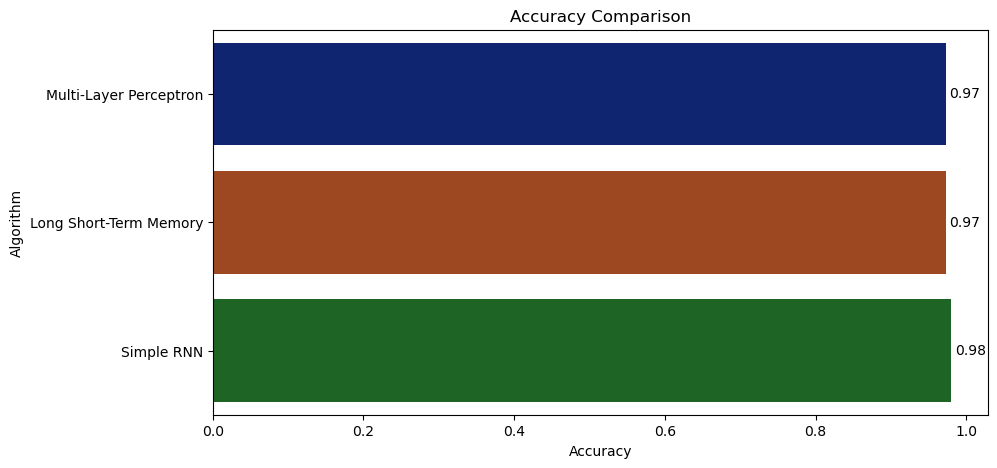

In [53]:
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=models, palette='dark')

for i, v in enumerate(acc):
    plt.text(v + 0.005, i, f"{v:.2f}", color='black', va='center')

plt.show()

In [54]:
accuracy_models = dict(zip(models, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Multi-Layer Perceptron --> 0.9727272987365723
Long Short-Term Memory --> 0.9727272987365723
Simple RNN --> 0.9795454740524292


In [55]:
# preds_mlp = model.predict(X_test[:5])
# predicted_mlp = le.inverse_transform(preds_mlp.argmax(axis=1))
# print("MLP predicted crops:", predicted_mlp)

In [56]:
custom_input = [[90, 42, 43, 20.87974371, 82.00274423, 6.502985292, 202.9355362]]
custom_input_scaled = scaler.transform(custom_input)

preds_mlp = model_mlp.predict(custom_input_scaled)
predicted_mlp = le.inverse_transform(preds_mlp.argmax(axis=1))

print("MLP predicted crop:", predicted_mlp[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
MLP predicted crop: rice
